# Aula 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime

In [3]:
dados = pd.read_csv('files/monitoramento_tempo.csv')
dados['data'] = pd.to_datetime(dados.data)
dados

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00
...,...,...,...,...,...,...,...
45248,282.000000,1031.0,81.0,50.0,2.0,Terça,2017-11-29 20:00:00
45249,282.890000,1030.0,71.0,330.0,1.0,Terça,2017-11-29 21:00:00
45250,283.390000,1030.0,71.0,290.0,1.0,Terça,2017-11-29 22:00:00
45251,283.020000,1029.0,71.0,290.0,2.0,Terça,2017-11-29 23:00:00


Text(0.5, 1.0, 'Temperatura em função do tempo')

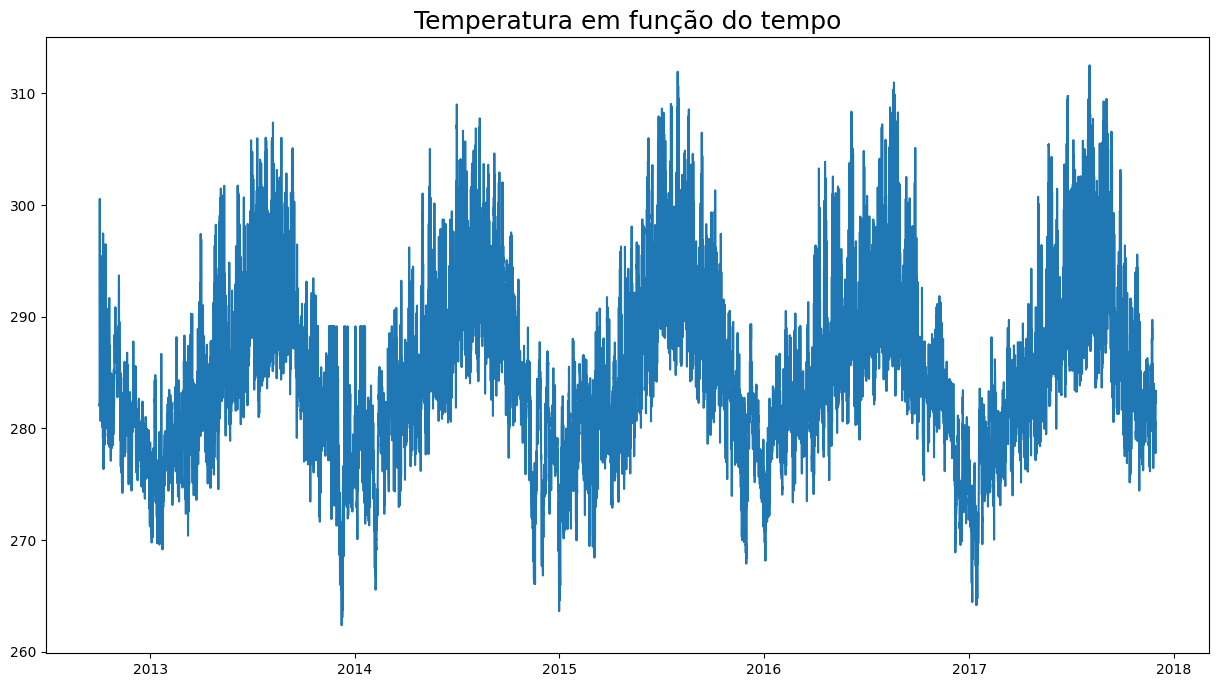

In [4]:
plt.figure(figsize=(15,8))
plt.plot(dados.data,dados.temperatura)
plt.title('Temperatura em função do tempo',fontsize=18)

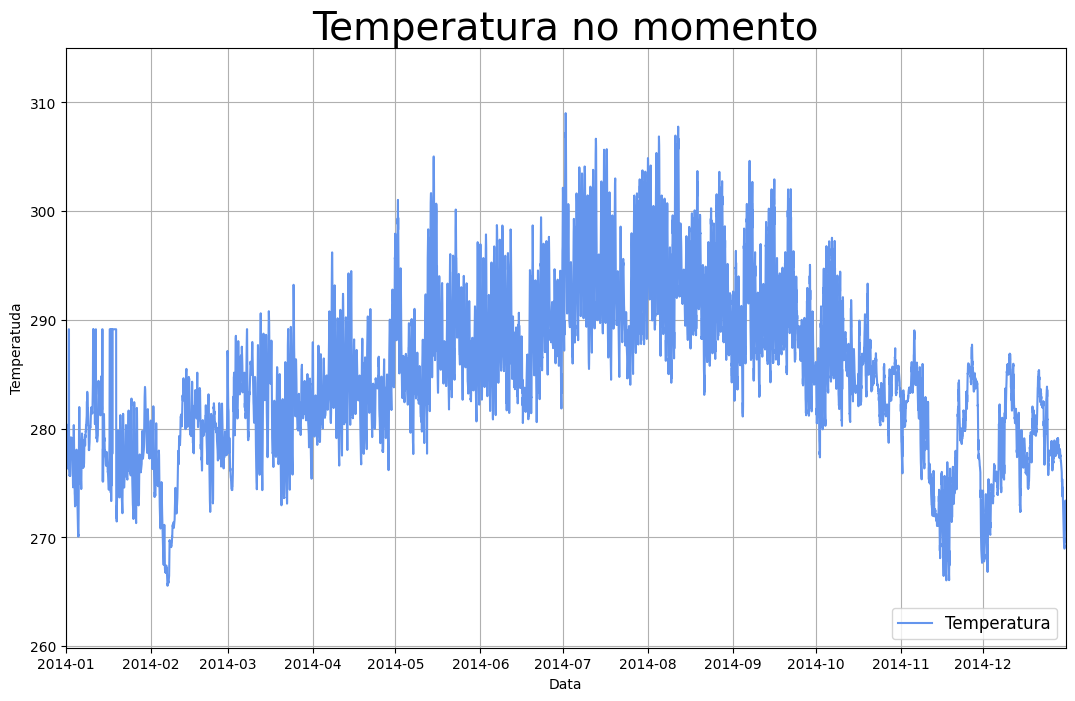

In [5]:
fig = plt.figure(figsize=(10,6))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(dados.data,dados.temperatura,color='cornflowerblue') #ls -> line style, lw -> line width, marker -> marcador
eixo.set_xlim(datetime.datetime(2014,1,1),datetime.datetime(2014,12,31))
eixo.set_title('Temperatura no momento', fontsize=28)
eixo.set_ylabel('Temperatuda')
eixo.set_xlabel('Data')
eixo.legend(['Temperatura'], loc = 'lower right', fontsize=12)
eixo.grid(True)

# Aula 2

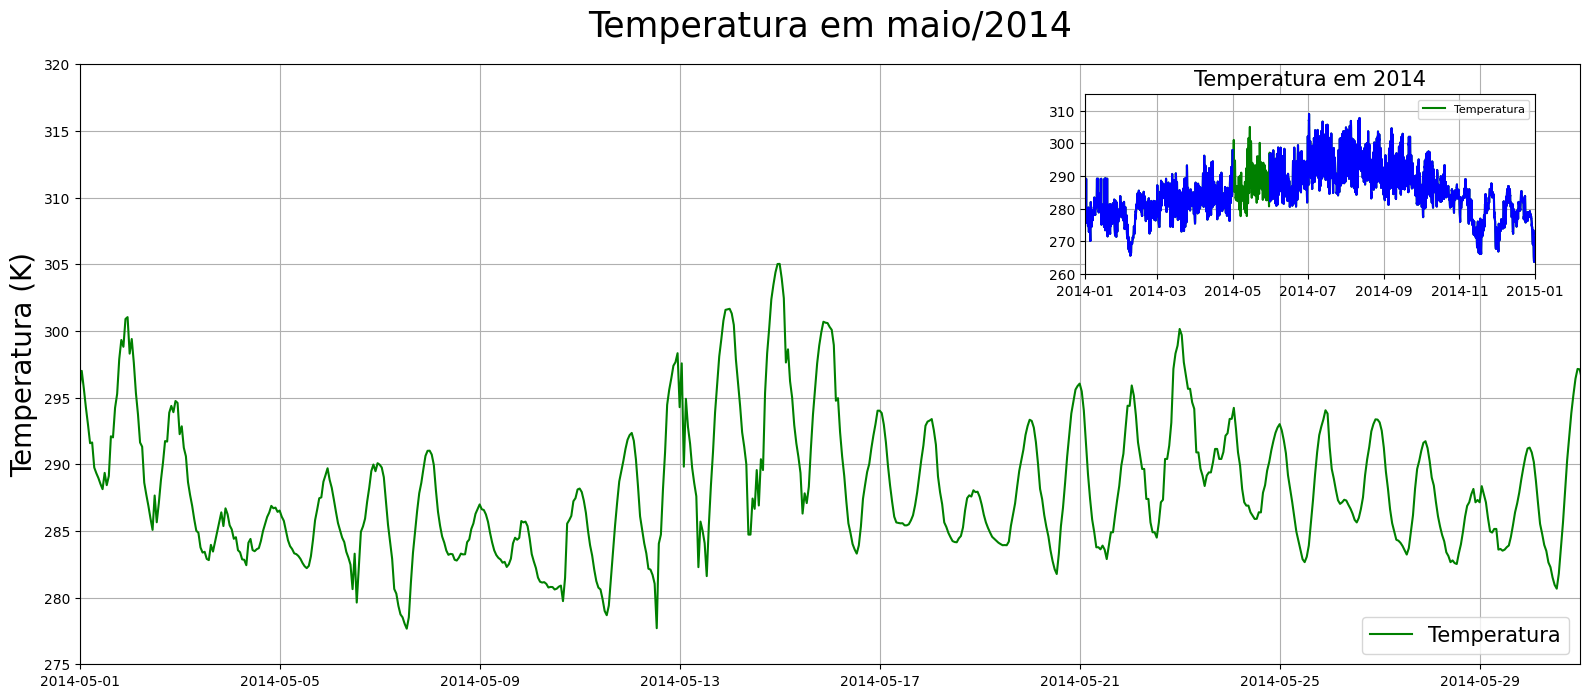

In [6]:
fig = plt.figure(figsize=(15,6))
eixo = fig.add_axes([0,0,1,1])
eixo2 = fig.add_axes([0.67,0.65,0.3,0.3])

eixo.grid(True)
eixo.plot(dados['data'], dados['temperatura'], color = 'g')
eixo.set_xlim(datetime.datetime(2014,5,1),datetime.datetime(2014,5,31))
eixo.set_ylim(275, 320)
eixo.set_title('Temperatura em maio/2014', fontsize=25, pad=20)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize=15)
eixo.set_ylabel('Temperatura (K)', fontsize=20)
#eixo.set_xlabel('Data', fontsize=20)

azul_esquerda = dados['data'] < datetime.datetime(2014,5,1)
azul_direita = dados['data'] > datetime.datetime(2014,5,31)


eixo2.grid(True)
eixo2.plot(dados['data'], dados['temperatura'], color = 'g')
eixo2.plot(dados[azul_esquerda]['data'], dados[azul_esquerda]['temperatura'], color = 'b')
eixo2.plot(dados[azul_direita]['data'], dados[azul_direita]['temperatura'], color = 'b')
eixo2.set_xlim(datetime.datetime(2014,1,1),datetime.datetime(2015,1,1))
eixo2.set_title('Temperatura em 2014', fontsize=15)
eixo2.legend(['Temperatura'], loc = 'best', fontsize=8)

# Aula 3

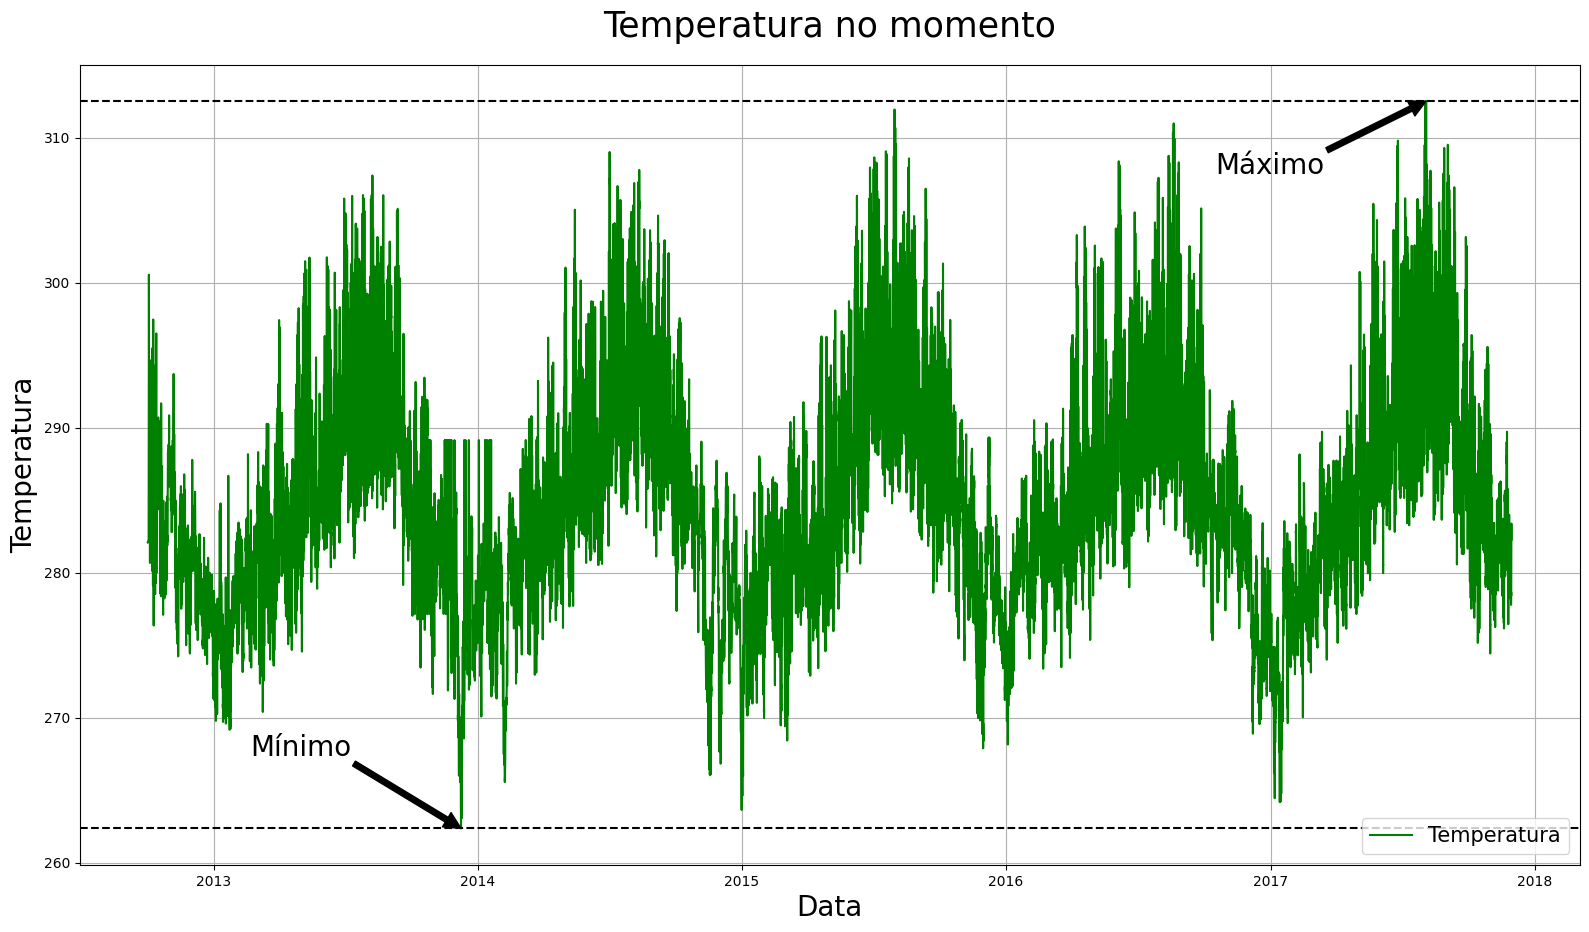

In [7]:
fig = plt.figure(figsize = (15,8))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(dados['data'], dados['temperatura'], color = 'g')
eixo.set_title('Temperatura no momento', fontsize = 25, pad = 20)
eixo.set_xlabel('Data', fontsize=20)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.legend(['Temperatura'], loc='lower right', fontsize=15)
eixo.grid(True)

x1 = dados['data'][dados['temperatura'].idxmax()]
y1 = max(dados['temperatura'])

x2 = dados['data'][dados['temperatura'].idxmax() - 7000]
y2 = max(dados['temperatura']) - 5

eixo.annotate('Máximo', xy=(x1,y1), fontsize=20, 
              xytext=(x2,y2), arrowprops=dict(facecolor='k'))

x1 = dados['data'][dados['temperatura'].idxmin()]
y1 = min(dados['temperatura'])

x2 = dados['data'][dados['temperatura'].idxmin() - 7000]
y2 = min(dados['temperatura']) + 5

eixo.annotate('Mínimo', xy=(x1,y1), fontsize=20, 
              xytext=(x2,y2), arrowprops=dict(facecolor='k'))

eixo.axhline(max(dados['temperatura']), color = 'k', linestyle='--')
eixo.axhline(min(dados['temperatura']), color = 'k', linestyle='--')

[Text(0, 0, 'Domingo'),
 Text(1, 0, 'Segunda'),
 Text(2, 0, 'Terça'),
 Text(3, 0, 'Quarta'),
 Text(4, 0, 'Quinta'),
 Text(5, 0, 'Sexta'),
 Text(6, 0, 'Sábado')]

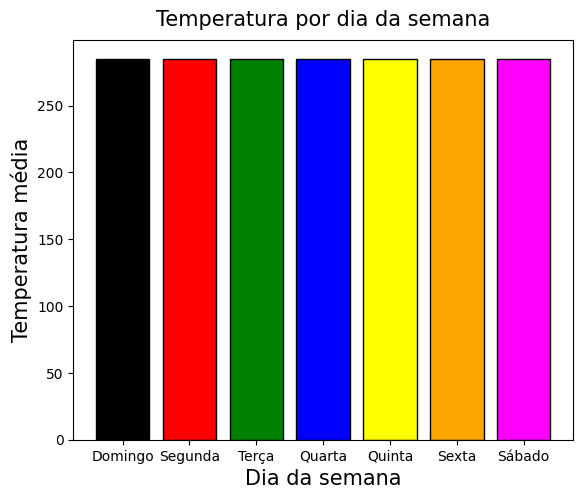

In [8]:
temperatura_por_dia_da_semana = dados.groupby('dia_da_semana')['temperatura'].mean()
nome_dias = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
temperatura_por_dia_da_semana = temperatura_por_dia_da_semana[nome_dias]

fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
indice = range(temperatura_por_dia_da_semana.shape[0])
cores = ['black', 'r', 'g', 'b', 'yellow', 'orange', 'magenta']

eixo.bar(indice, temperatura_por_dia_da_semana, color=cores, edgecolor='black')
eixo.set_title('Temperatura por dia da semana', fontsize=15, pad=10)
eixo.set_xlabel('Dia da semana', fontsize=15)
eixo.set_ylabel('Temperatura média', fontsize=15)
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias)

Text(0.5, 1.0, 'Temperatura por dia da semana')

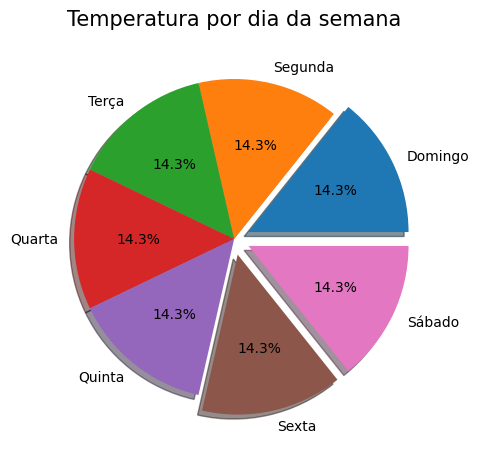

In [9]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

explodir = [0.1,0,0,0,0,0.1,0.1]

eixo.pie(temperatura_por_dia_da_semana, labels=temperatura_por_dia_da_semana.index,
         autopct='%.1f%%', explode=explodir, shadow=True)
eixo.set_title('Temperatura por dia da semana', size=15, pad=10)

In [26]:
dados = pd.read_csv('files/iris.csv', engine='pyarrow')

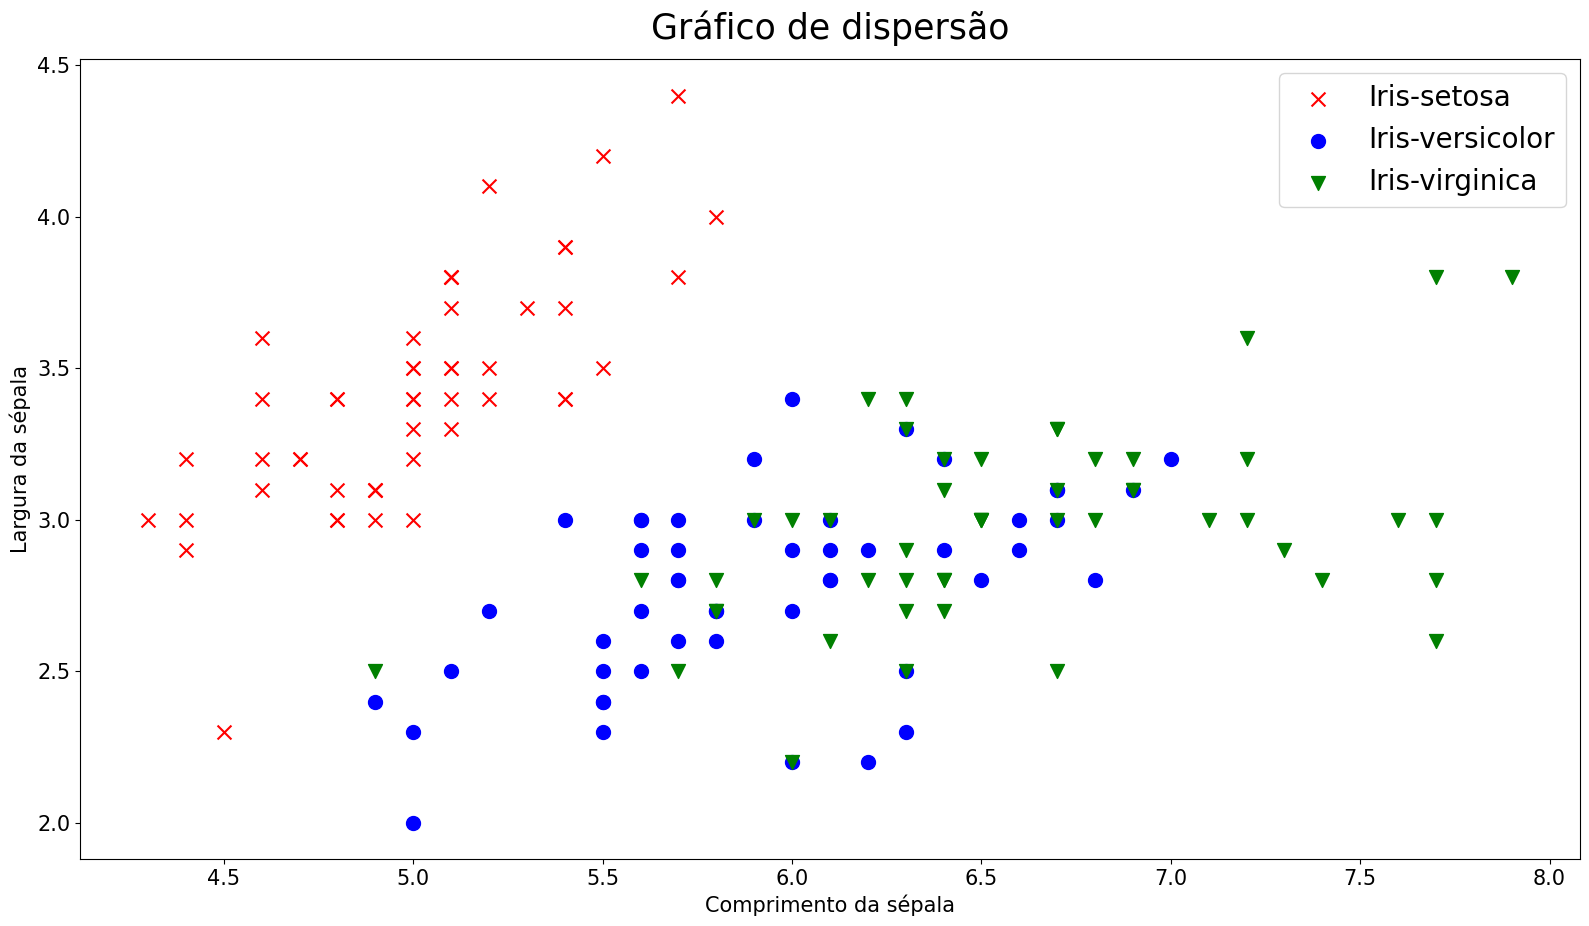

In [27]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

cores = {'Iris-setosa': 'r', 'Iris-versicolor': 'b', 'Iris-virginica': 'g'}
marcadores = {'Iris-setosa': 'x', 'Iris-versicolor': 'o', 'Iris-virginica': 'v'}

for especie in dados['espécie'].unique():
    tmp = dados[dados['espécie'] == especie]
    eixo.scatter(tmp['comprimento_sépala'], tmp['largura_sépala'],
                 color=cores[especie], marker=marcadores[especie],
                 s=100)

eixo.set_title('Gráfico de dispersão', fontsize=25, pad=15)
eixo.set_xlabel('Comprimento da sépala', fontsize=15)
eixo.set_ylabel('Largura da sépala', fontsize=15)
eixo.tick_params(labelsize=15)
eixo.legend(cores, fontsize=20)

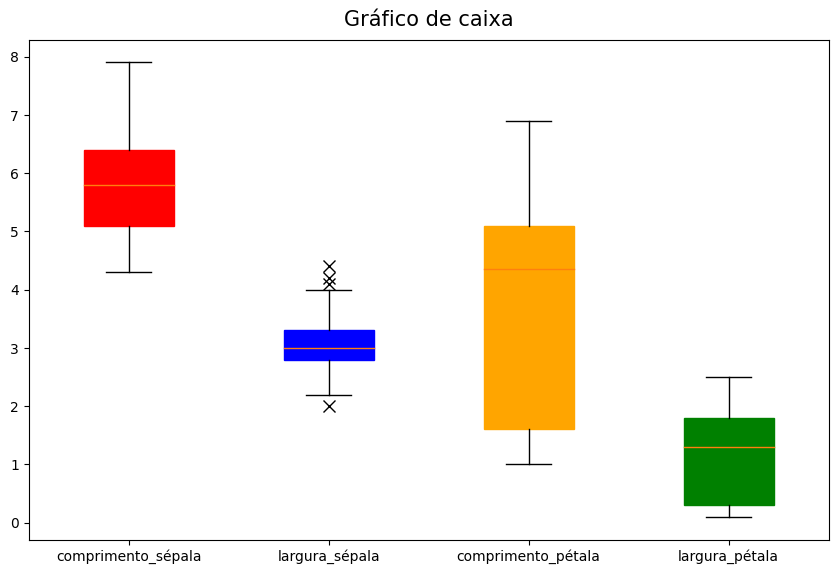

In [18]:
fig = plt.figure(figsize=(8,5))
eixo = fig.add_axes([0,0,1,1])

cores = ['red', 'blue', 'orange', 'green']

caixas = eixo.boxplot(dados.drop('espécie', axis=1).values, patch_artist=True)
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(dados.drop('espécie', axis=1).columns)

for caixa, cor in zip(caixas['boxes'], cores):
    caixa.set(color=cor)

for outlier in caixas['fliers']:
    outlier.set(marker='x', markersize=8)

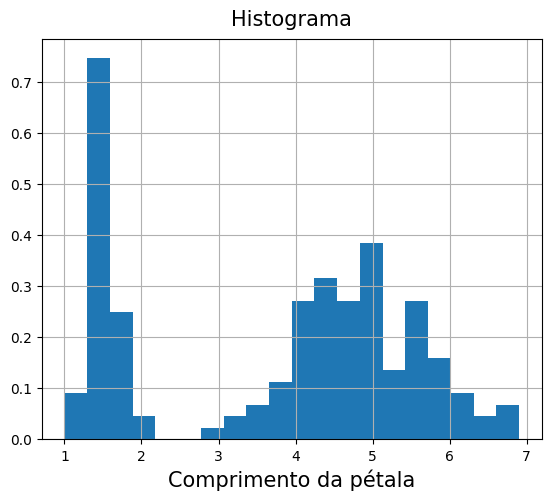

In [22]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(dados['comprimento_pétala'], bins=20, density=True)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

Text(4.55, 31, 'mediana')

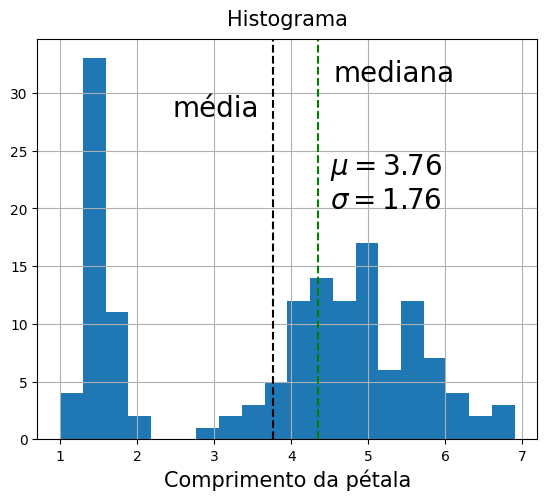

In [34]:

fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

mu, sigma = dados['comprimento_pétala'].mean(), dados['comprimento_pétala'].std()

eixo.hist(dados['comprimento_pétala'], bins=20)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
               xy=(4.5, 20), fontsize=20)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(mu-1.3, 28), fontsize=20)

eixo.axvline(dados['comprimento_pétala'].median(), color='g', linestyle='--')
eixo.annotate('mediana', xy=(dados['comprimento_pétala'].median()+0.2, 31), fontsize=20)

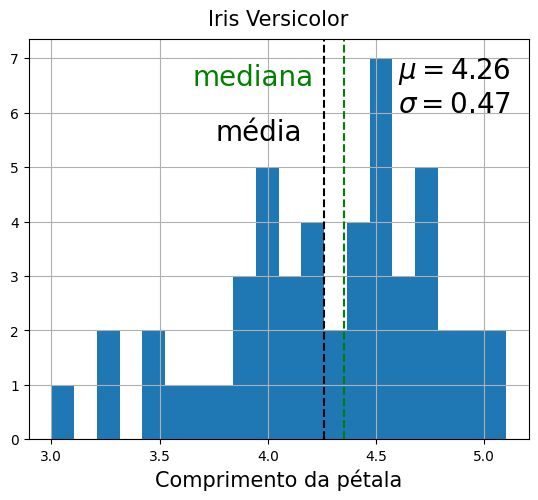

In [35]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

df_iv = dados[dados['espécie'] == 'Iris-versicolor']

mu, sigma = df_iv['comprimento_pétala'].mean(), df_iv['comprimento_pétala'].std()

eixo.hist(df_iv['comprimento_pétala'], bins=20)
eixo.set_title('Iris Versicolor', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
               xy=(4.6, 6), fontsize=20)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(mu-0.5, 5.5), fontsize=20)

eixo.axvline(df_iv['comprimento_pétala'].median(), color='g', linestyle='--')
eixo.annotate('mediana', xy=(df_iv['comprimento_pétala'].median()-0.7, 6.5), fontsize=20,
               color='g')

fig.savefig('img/histograma_iv.png', bbox_inches='tight')

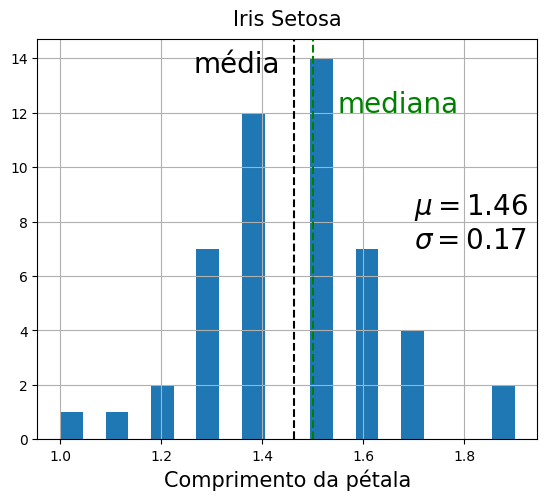

In [33]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

df_is = dados[dados['espécie'] == 'Iris-setosa']

mu, sigma = df_is['comprimento_pétala'].mean(), df_is['comprimento_pétala'].std()

eixo.hist(df_is['comprimento_pétala'], bins=20)
eixo.set_title('Iris Setosa', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
               xy=(1.7, 7), fontsize=20)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(mu-0.2, 13.5), fontsize=20)

eixo.axvline(df_is['comprimento_pétala'].median(), color='g', linestyle='--')
eixo.annotate('mediana', xy=(df_is['comprimento_pétala'].median()+0.05, 12), fontsize=20,
               color='g')

fig.savefig('img/histograma_is.png', bbox_inches='tight')

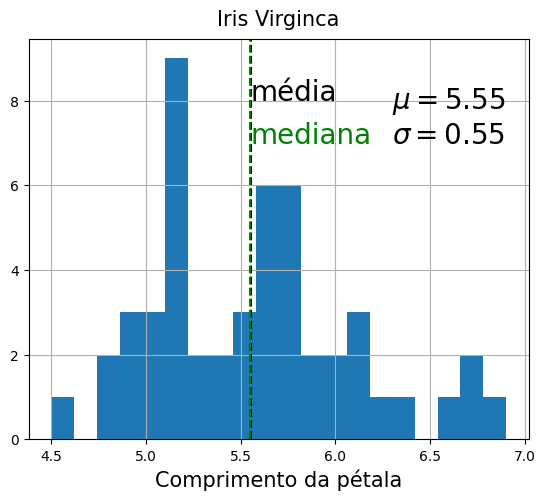

In [36]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

df_ivc = dados[dados['espécie'] == 'Iris-virginica']

mu, sigma = df_ivc['comprimento_pétala'].mean(), df_ivc['comprimento_pétala'].std()

eixo.hist(df_ivc['comprimento_pétala'], bins=20)
eixo.set_title('Iris Virginca', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
               xy=(6.3, 7), fontsize=20)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(mu, 8), fontsize=20)

eixo.axvline(df_ivc['comprimento_pétala'].median(), color='g', linestyle='--')
eixo.annotate('mediana', xy=(df_ivc['comprimento_pétala'].median(), 7), fontsize=20,
               color='g')

fig.savefig('img/histograma_ivg.png', bbox_inches='tight')

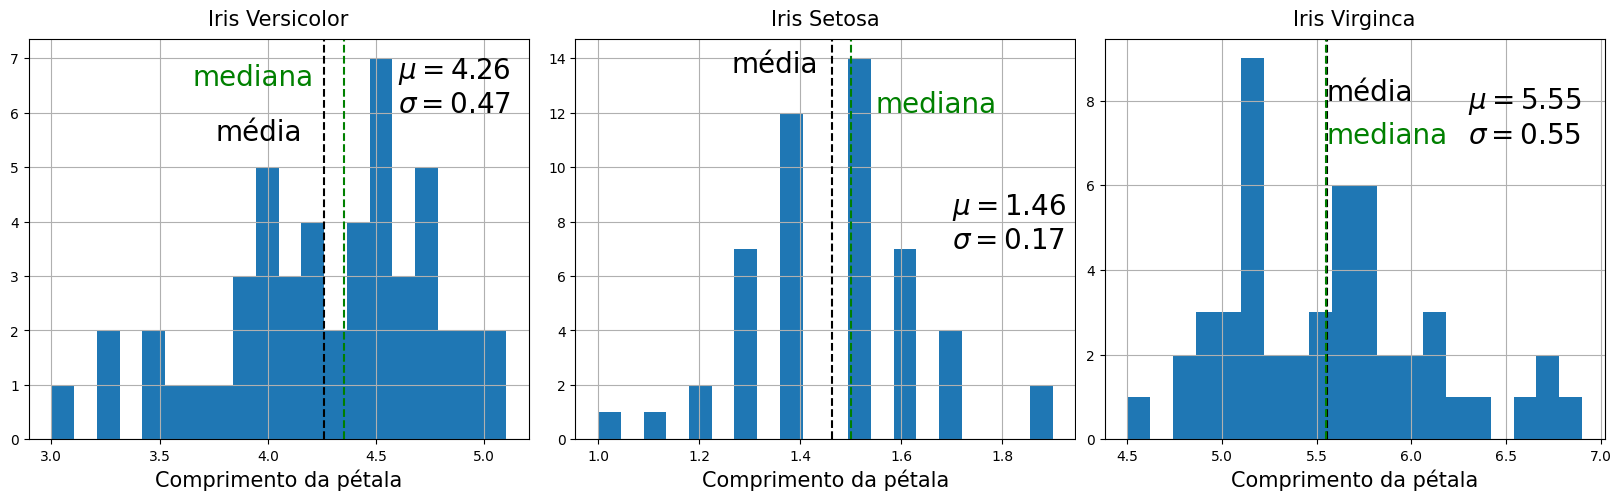

In [72]:
from PIL import Image

largura, altura = Image.open('img/histograma_iv.png').size
combinada = Image.new("RGB", (3*largura, altura))
intervalo = 0
for imagem in map(Image.open, ['img/histograma_iv.png', 'img/histograma_is.png',
                               'img/histograma_ivg.png']):
    combinada.paste(imagem, (intervalo, 0))
    intervalo += largura

combinada.save('img/combinada.png')
combinada